[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Khipucamayoc/Quipucamayoc/blob/master/colabs/TTS_Eielson_SNR.ipynb)

From: https://github.com/mozilla/TTS/blob/master/dataset_analysis/CheckDatasetSNR.ipynb

In [ ]:
!wget http://www.cs.cmu.edu/~robust/archive/algorithms/WADA_SNR_IS_2008/WadaSNR.tar.gz
!mkdir WADA_SNR_IS_2008/ && tar -xvf WadaSNR.tar.gz -C WADA_SNR_IS_2008
!sudo apt-get install ffmpeg
!pip install soundfile

--2020-04-23 18:40:31--  http://www.cs.cmu.edu/~robust/archive/algorithms/WADA_SNR_IS_2008/WadaSNR.tar.gz
Resolving www.cs.cmu.edu (www.cs.cmu.edu)... 128.2.42.95
Connecting to www.cs.cmu.edu (www.cs.cmu.edu)|128.2.42.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2878515 (2.7M) [application/x-gzip]
Saving to: ‘WadaSNR.tar.gz’

WadaSNR.tar.gz      100%[===================>]   2.75M  1.57MB/s    in 1.7s    

2020-04-23 18:40:33 (1.57 MB/s) - ‘WadaSNR.tar.gz’ saved [2878515/2878515]

Build/
Build/AudioFile.o
Build/case.o
Build/ckd_alloc.o
Build/SNREst.o
Build/Table.o
Build/Makefile
Build/info.o
Build/Main.o
Build/cmd_ln.o
Build/hash.o
Build/err.o
Build/glist.o
Build/fe_sigproc.o
Build/Config.o
Doc/
Exe/
Exe/WADASNR
Exe/Alpha0.400000.txt
Header/
Header/SNREst.h
Header/Config.h
Header/Debug/
Header/AudioFile.h
Header/Table.h
README
SampleCorrupt/
SampleCorrupt/sb02_Clean.sph
SampleCorrupt/sb01_20dB_Music.sph
SampleCorrupt/sb02_00dB_White.sph
SampleCorrupt/sb01_

In [ ]:
!sudo apt install musl-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  musl
Recommended packages:
  linux-musl-dev
The following NEW packages will be installed:
  musl musl-dev
0 upgraded, 2 newly installed, 0 to remove and 25 not upgraded.
Need to get 905 kB of archives.
After this operation, 3,973 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 musl amd64 1.1.19-1 [367 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 musl-dev amd64 1.1.19-1 [538 kB]
Fetched 905 kB in 1s (943 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
d

In [ ]:
!sudo apt-get install gcc-multilib g++-multilib

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  g++-7-multilib gcc-7-multilib lib32asan4 lib32atomic1 lib32cilkrts5
  lib32gcc-7-dev lib32gomp1 lib32itm1 lib32mpx2 lib32quadmath0
  lib32stdc++-7-dev lib32ubsan0 libc6-dev-i386 libc6-dev-x32 libc6-x32
  libx32asan4 libx32atomic1 libx32cilkrts5 libx32gcc-7-dev libx32gcc1
  libx32gomp1 libx32itm1 libx32quadmath0 libx32stdc++-7-dev libx32stdc++6
  libx32ubsan0
Suggested packages:
  lib32stdc++6-7-dbg libx32stdc++6-7-dbg
The following NEW packages will be installed:
  g++-7-multilib g++-multilib gcc-7-multilib gcc-multilib lib32asan4
  lib32atomic1 lib32cilkrts5 lib32gcc-7-dev lib32gomp1 lib32itm1 lib32mpx2
  lib32quadmath0 lib32stdc++-7-dev lib32ubsan0 libc6-dev-i386 libc6-dev-x32
  libc6-x32 libx32asan4 libx32atomic1 libx32cilkrts5 libx32gcc-7-dev
  libx32gcc1 libx32gomp1 libx32itm1 libx32quadmath0 libx32stdc++-7-dev
  libx32stdc++6 libx3

In [ ]:
!cd /content/WADA_SNR_IS_2008/Build/ && rm -rf *.o && make clean && make

rm -fr *.o *.core ../Exe/WADASNR
gcc  -I../Header -I../src/libs3decoder -I../src -I../src/libutil -I../src/ANModel -O3 -m32 -c ../src/libs3decoder/fe_sigproc.c ../src/libutil/case.c ../src/libutil/ckd_alloc.c ../src/libutil/cmd_ln.c ../src/libutil/err.c ../src/libutil/glist.c ../src/libutil/hash.c ../src/libutil/info.c 
../src/libutil/info.c: In function ‘print_appl_info’:
../src/libutil/info.c:51:2: warning: ignoring return value of ‘getcwd’, declared with attribute warn_unused_result [-Wunused-result]
  getcwd (path, sizeof(path));
  ^~~~~~~~~~~~~~~~~~~~~~~~~~~
g++ -I../Header -I../src/libs3decoder -I../src -I../src/libutil -I../src/ANModel -O3 -m32 -c ../Source/AudioFile.cpp ../Source/Config.cpp ../Source/Main.cpp ../Source/Table.cpp ../Source/SNREst.cpp 
../Source/AudioFile.cpp: In member function ‘int32 CAudioFile::GetFileSize()’:
../Source/AudioFile.cpp:165:122: warning: format ‘%d’ expects argument of type ‘int’, but argument 4 has type ‘long int’ [-Wformat=]
  fprintf(g_logFile

In [ ]:
import os, sys
import glob
import subprocess
import tempfile
import IPython
import soundfile as sf
import numpy as np
from tqdm import tqdm
from multiprocessing import Pool
from matplotlib import pylab as plt
%matplotlib inline

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1epbIkiH0KxR8l5ahKiCaoWewc8Z7QMtU"})
downloaded.GetContentFile('transcript.txt')
downloaded = drive.CreateFile({'id':"18VuosmyzdSiEFevPkc6nvTwCaGEIAQFE"})
downloaded.GetContentFile('eielsonvoices_22050.tar.gz')
!tar -xvf eielsonvoices_22050.tar.gz

eielsonvoices_22050/
eielsonvoices_22050/ymilengua.wav
eielsonvoices_22050/uno30.wav
eielsonvoices_22050/uno24.wav
eielsonvoices_22050/uno18.wav
eielsonvoices_22050/amarillo.wav
eielsonvoices_22050/miraba.wav
eielsonvoices_22050/puerta.wav
eielsonvoices_22050/16.wav
eielsonvoices_22050/dos36.wav
eielsonvoices_22050/dos22.wav
eielsonvoices_22050/103.wav
eielsonvoices_22050/117.wav
eielsonvoices_22050/noverenunca.wav
eielsonvoices_22050/entreunabrir.wav
eielsonvoices_22050/unvacio.wav
eielsonvoices_22050/116.wav
eielsonvoices_22050/yelcielo.wav
eielsonvoices_22050/102.wav
eielsonvoices_22050/dos23.wav
eielsonvoices_22050/dos37.wav
eielsonvoices_22050/17.wav
eielsonvoices_22050/uno19.wav
eielsonvoices_22050/ultimocuerpo.wav
eielsonvoices_22050/uno25.wav
eielsonvoices_22050/uno31.wav
eielsonvoices_22050/cuyonombre.wav
eielsonvoices_22050/uno27.wav
eielsonvoices_22050/uno33.wav
eielsonvoices_22050/albergodelsole1.wav
eielsonvoices_22050/ymicamisa.wav
eielsonvoices_22050/15.wav
eielsonvoices

In [ ]:
# Set the meta parameters
DATA_PATH = "/content/eielsonvoices_22050"
NUM_PROC = 1
CURRENT_PATH = "/content"

In [ ]:
def compute_file_snr(file_path):
    """ Convert given file to required format with FFMPEG and process with WADA."""
    _, sr = sf.read(file_path)
    new_file = file_path.replace(".wav", "_tmp.wav")
    print(new_file)
    if sr != 16000:
      command = f'ffmpeg -i "{file_path}" -ac 1 -acodec pcm_s16le -y -ar 16000 "{new_file}"'
    else:
      command = f'cp "{file_path}" "{new_file}"'
    os.system(command)
    output = !/content/WADA_SNR_IS_2008/Exe/WADASNR -i {new_file} -t /content/WADA_SNR_IS_2008/Exe/Alpha0.400000.txt -ifmt mswav 
    snr = float(output[-2].split()[-2])
    os.system(f'rm "{new_file}"')
    return snr, file_path

In [ ]:
!/content/WADA_SNR_IS_2008/Exe/WADASNR -i /content/WADA_SNR_IS_2008/SampleCorrupt/sb01_00dB_White.sph -t /content/WADA_SNR_IS_2008/Exe/Alpha0.400000.txt -ifmt nist 

ERROR: ld.so: object '/usr/lib/x86_64-linux-gnu/libtcmalloc.so.4' from LD_PRELOAD cannot be preloaded (wrong ELF class: ELFCLASS64): ignored.
INFO: ../src/libutil/info.c(53): Host: '3b1b2d80fbc8'
INFO: ../src/libutil/info.c(54): Directory: '/content'
INFO: ../src/libutil/info.c(58): /content/WADA_SNR_IS_2008/Exe/WADASNR Compiled on: Apr 23 2020, AT: 18:41:02

INFO: ../src/libutil/cmd_ln.c(381): Parsing command line:
/content/WADA_SNR_IS_2008/Exe/WADASNR \
	-i /content/WADA_SNR_IS_2008/SampleCorrupt/sb01_00dB_White.sph \
	-t /content/WADA_SNR_IS_2008/Exe/Alpha0.400000.txt \
	-ifmt nist 

Current configuration:
[NAME]		[DEFLT]	[VALUE]
-i			/content/WADA_SNR_IS_2008/SampleCorrupt/sb01_00dB_White.sph
-ifmt		nist	nist
-input_endian	little	little
-logfn			
-srate		16000.0	1.600000e+04
-t			/content/WADA_SNR_IS_2008/Exe/Alpha0.400000.txt

INFO: ../Source/Config.cpp(76): Logfile will not be used.
Total SNR is 1.000000 dB.


In [ ]:
wav_file = "/content/eielsonvoices_22050/1.wav"
output = compute_file_snr(wav_file)
output

/content/eielsonvoices_22050/1_tmp.wav


(16.0, '/content/eielsonvoices_22050/1.wav')

In [ ]:
wav_files = glob.glob(f"{DATA_PATH}/*.wav", recursive=True)
print(f" > Number of wav files {len(wav_files)}")

 > Number of wav files 399


In [ ]:
if NUM_PROC == 1:
    file_snrs = [None] * len(wav_files) 
    for idx, wav_file in tqdm(enumerate(wav_files)):
        tup = compute_file_snr(wav_file)
        file_snrs[idx] = tup
else:
    with Pool(NUM_PROC) as pool:
        file_snrs = list(tqdm(pool.imap(compute_file_snr, wav_files), total=len(wav_files)))

0it [00:00, ?it/s]

/content/eielsonvoices_22050/luchar_tmp.wav


1it [00:01,  1.06s/it]

/content/eielsonvoices_22050/54_tmp.wav


2it [00:01,  1.02s/it]

/content/eielsonvoices_22050/uno28_tmp.wav


3it [00:02,  1.03it/s]

/content/eielsonvoices_22050/todoesta_tmp.wav


4it [00:03,  1.08it/s]

/content/eielsonvoices_22050/dos16_tmp.wav


5it [00:04,  1.09it/s]

/content/eielsonvoices_22050/106_tmp.wav


6it [00:05,  1.13it/s]

/content/eielsonvoices_22050/dos38_tmp.wav


7it [00:06,  1.12it/s]

/content/eielsonvoices_22050/dos30_tmp.wav


8it [00:07,  1.16it/s]

/content/eielsonvoices_22050/107_tmp.wav


9it [00:07,  1.19it/s]

/content/eielsonvoices_22050/3_tmp.wav


10it [00:08,  1.19it/s]

/content/eielsonvoices_22050/tres7_tmp.wav


11it [00:09,  1.23it/s]

/content/eielsonvoices_22050/abriras_tmp.wav


12it [00:10,  1.18it/s]

/content/eielsonvoices_22050/163_tmp.wav


13it [00:11,  1.16it/s]

/content/eielsonvoices_22050/soyuno_tmp.wav


14it [00:12,  1.11it/s]

/content/eielsonvoices_22050/108_tmp.wav


15it [00:13,  1.14it/s]

/content/eielsonvoices_22050/tres4_tmp.wav


16it [00:14,  1.07it/s]

/content/eielsonvoices_22050/dos28_tmp.wav


17it [00:15,  1.08it/s]

/content/eielsonvoices_22050/137_tmp.wav


18it [00:15,  1.12it/s]

/content/eielsonvoices_22050/21_tmp.wav


19it [00:16,  1.12it/s]

/content/eielsonvoices_22050/quecosa_tmp.wav


20it [00:17,  1.16it/s]

/content/eielsonvoices_22050/31_tmp.wav


21it [00:18,  1.14it/s]

/content/eielsonvoices_22050/dos21_tmp.wav


22it [00:19,  1.17it/s]

/content/eielsonvoices_22050/dos32_tmp.wav


23it [00:20,  1.20it/s]

/content/eielsonvoices_22050/18_tmp.wav


24it [00:20,  1.17it/s]

/content/eielsonvoices_22050/dos5_tmp.wav


25it [00:21,  1.18it/s]

/content/eielsonvoices_22050/text18_tmp.wav


26it [00:22,  1.21it/s]

/content/eielsonvoices_22050/amarillo_tmp.wav


27it [00:23,  1.22it/s]

/content/eielsonvoices_22050/164_tmp.wav


28it [00:24,  1.23it/s]

/content/eielsonvoices_22050/162_tmp.wav


29it [00:24,  1.24it/s]

/content/eielsonvoices_22050/tres3_tmp.wav


30it [00:25,  1.24it/s]

/content/eielsonvoices_22050/34_tmp.wav


31it [00:26,  1.25it/s]

/content/eielsonvoices_22050/19_tmp.wav


32it [00:27,  1.20it/s]

/content/eielsonvoices_22050/comparto_tmp.wav


33it [00:28,  1.22it/s]

/content/eielsonvoices_22050/135_tmp.wav


34it [00:29,  1.22it/s]

/content/eielsonvoices_22050/65_tmp.wav


35it [00:29,  1.23it/s]

/content/eielsonvoices_22050/haciamimismo_tmp.wav


36it [00:30,  1.23it/s]

/content/eielsonvoices_22050/text22_tmp.wav


37it [00:31,  1.20it/s]

/content/eielsonvoices_22050/41_tmp.wav


38it [00:32,  1.21it/s]

/content/eielsonvoices_22050/esculturadepalabras_tmp.wav


39it [00:33,  1.23it/s]

/content/eielsonvoices_22050/elcerebroenlasombra_tmp.wav


40it [00:34,  1.19it/s]

/content/eielsonvoices_22050/dos43_tmp.wav


41it [00:34,  1.20it/s]

/content/eielsonvoices_22050/uno10_tmp.wav


42it [00:35,  1.22it/s]

/content/eielsonvoices_22050/uno15_tmp.wav


43it [00:36,  1.23it/s]

/content/eielsonvoices_22050/147_tmp.wav


44it [00:37,  1.23it/s]

/content/eielsonvoices_22050/dos3_tmp.wav


45it [00:38,  1.24it/s]

/content/eielsonvoices_22050/uno14_tmp.wav


46it [00:38,  1.25it/s]

/content/eielsonvoices_22050/yelanochecer_tmp.wav


47it [00:39,  1.20it/s]

/content/eielsonvoices_22050/148_tmp.wav


48it [00:40,  1.17it/s]

/content/eielsonvoices_22050/niunamujer_tmp.wav


49it [00:41,  1.20it/s]

/content/eielsonvoices_22050/92_tmp.wav


50it [00:42,  1.21it/s]

/content/eielsonvoices_22050/109_tmp.wav


51it [00:43,  1.16it/s]

/content/eielsonvoices_22050/uno19_tmp.wav


52it [00:44,  1.17it/s]

/content/eielsonvoices_22050/58_tmp.wav


53it [00:44,  1.14it/s]

/content/eielsonvoices_22050/dos25_tmp.wav


54it [00:45,  1.17it/s]

/content/eielsonvoices_22050/arrastrando_tmp.wav


55it [00:46,  1.20it/s]

/content/eielsonvoices_22050/7_tmp.wav


56it [00:47,  1.17it/s]

/content/eielsonvoices_22050/68_tmp.wav


57it [00:48,  1.19it/s]

/content/eielsonvoices_22050/71_tmp.wav


58it [00:49,  1.20it/s]

/content/eielsonvoices_22050/cuerpoenexilio_tmp.wav


59it [00:49,  1.18it/s]

/content/eielsonvoices_22050/dos14_tmp.wav


60it [00:50,  1.21it/s]

/content/eielsonvoices_22050/66_tmp.wav


61it [00:51,  1.21it/s]

/content/eielsonvoices_22050/dos39_tmp.wav


62it [00:52,  1.21it/s]

/content/eielsonvoices_22050/entremil_tmp.wav


63it [00:53,  1.23it/s]

/content/eielsonvoices_22050/2_tmp.wav


64it [00:53,  1.24it/s]

/content/eielsonvoices_22050/tres8_tmp.wav


65it [00:54,  1.24it/s]

/content/eielsonvoices_22050/75_tmp.wav


66it [00:55,  1.20it/s]

/content/eielsonvoices_22050/180_tmp.wav


67it [00:56,  1.21it/s]

/content/eielsonvoices_22050/dos42_tmp.wav


68it [00:57,  1.23it/s]

/content/eielsonvoices_22050/tres10_tmp.wav


69it [00:58,  1.23it/s]

/content/eielsonvoices_22050/33_tmp.wav


70it [00:58,  1.23it/s]

/content/eielsonvoices_22050/hayolores_tmp.wav


71it [00:59,  1.24it/s]

/content/eielsonvoices_22050/hayunaglandula_tmp.wav


72it [01:00,  1.25it/s]

/content/eielsonvoices_22050/uno1_tmp.wav


73it [01:01,  1.20it/s]

/content/eielsonvoices_22050/text31_tmp.wav


74it [01:02,  1.22it/s]

/content/eielsonvoices_22050/rotacion_tmp.wav


75it [01:02,  1.22it/s]

/content/eielsonvoices_22050/83_tmp.wav


76it [01:03,  1.23it/s]

/content/eielsonvoices_22050/159_tmp.wav


77it [01:04,  1.24it/s]

/content/eielsonvoices_22050/text25_tmp.wav


78it [01:05,  1.25it/s]

/content/eielsonvoices_22050/84_tmp.wav


79it [01:06,  1.20it/s]

/content/eielsonvoices_22050/uno31_tmp.wav


80it [01:07,  1.17it/s]

/content/eielsonvoices_22050/113_tmp.wav


81it [01:08,  1.15it/s]

/content/eielsonvoices_22050/entreunabrir_tmp.wav


82it [01:08,  1.18it/s]

/content/eielsonvoices_22050/46_tmp.wav


83it [01:09,  1.20it/s]

/content/eielsonvoices_22050/ymilengua_tmp.wav


84it [01:10,  1.17it/s]

/content/eielsonvoices_22050/96_tmp.wav


85it [01:11,  1.20it/s]

/content/eielsonvoices_22050/48_tmp.wav


86it [01:12,  1.21it/s]

/content/eielsonvoices_22050/81_tmp.wav


87it [01:12,  1.21it/s]

/content/eielsonvoices_22050/116_tmp.wav


88it [01:13,  1.19it/s]

/content/eielsonvoices_22050/153_tmp.wav


89it [01:14,  1.16it/s]

/content/eielsonvoices_22050/uno2_tmp.wav


90it [01:15,  1.11it/s]

/content/eielsonvoices_22050/74_tmp.wav


91it [01:16,  1.14it/s]

/content/eielsonvoices_22050/123_tmp.wav


92it [01:17,  1.18it/s]

/content/eielsonvoices_22050/escultura_tmp.wav


93it [01:18,  1.12it/s]

/content/eielsonvoices_22050/104_tmp.wav


94it [01:19,  1.15it/s]

/content/eielsonvoices_22050/vistosaco_tmp.wav


95it [01:20,  1.14it/s]

/content/eielsonvoices_22050/82_tmp.wav


96it [01:20,  1.18it/s]

/content/eielsonvoices_22050/44_tmp.wav


97it [01:21,  1.19it/s]

/content/eielsonvoices_22050/174_tmp.wav


98it [01:22,  1.17it/s]

/content/eielsonvoices_22050/156_tmp.wav


99it [01:23,  1.14it/s]

/content/eielsonvoices_22050/118_tmp.wav


100it [01:24,  1.18it/s]

/content/eielsonvoices_22050/contro_tmp.wav


101it [01:25,  1.20it/s]

/content/eielsonvoices_22050/hormigueo_tmp.wav


102it [01:25,  1.22it/s]

/content/eielsonvoices_22050/177_tmp.wav


103it [01:26,  1.23it/s]

/content/eielsonvoices_22050/dos41_tmp.wav


104it [01:27,  1.23it/s]

/content/eielsonvoices_22050/rojo_tmp.wav


105it [01:28,  1.19it/s]

/content/eielsonvoices_22050/56_tmp.wav


106it [01:29,  1.21it/s]

/content/eielsonvoices_22050/99_tmp.wav


107it [01:30,  1.18it/s]

/content/eielsonvoices_22050/86_tmp.wav


108it [01:30,  1.16it/s]

/content/eielsonvoices_22050/61_tmp.wav


109it [01:31,  1.18it/s]

/content/eielsonvoices_22050/444_tmp.wav


110it [01:32,  1.16it/s]

/content/eielsonvoices_22050/dos19_tmp.wav


111it [01:33,  1.19it/s]

/content/eielsonvoices_22050/168_tmp.wav


112it [01:34,  1.19it/s]

/content/eielsonvoices_22050/42_tmp.wav


113it [01:35,  1.18it/s]

/content/eielsonvoices_22050/130_tmp.wav


114it [01:35,  1.20it/s]

/content/eielsonvoices_22050/uno27_tmp.wav


115it [01:36,  1.21it/s]

/content/eielsonvoices_22050/uno5_tmp.wav


116it [01:37,  1.23it/s]

/content/eielsonvoices_22050/40_tmp.wav


117it [01:38,  1.22it/s]

/content/eielsonvoices_22050/quearrastrar_tmp.wav


118it [01:39,  1.24it/s]

/content/eielsonvoices_22050/text19_tmp.wav


119it [01:39,  1.23it/s]

/content/eielsonvoices_22050/138_tmp.wav


120it [01:40,  1.20it/s]

/content/eielsonvoices_22050/tres9_tmp.wav


121it [01:41,  1.22it/s]

/content/eielsonvoices_22050/11_tmp.wav


122it [01:42,  1.19it/s]

/content/eielsonvoices_22050/112_tmp.wav


123it [01:43,  1.20it/s]

/content/eielsonvoices_22050/campidoglio_tmp.wav


124it [01:44,  1.21it/s]

/content/eielsonvoices_22050/55_tmp.wav


125it [01:44,  1.22it/s]

/content/eielsonvoices_22050/90_tmp.wav


126it [01:45,  1.23it/s]

/content/eielsonvoices_22050/154_tmp.wav


127it [01:46,  1.24it/s]

/content/eielsonvoices_22050/miromisexo_tmp.wav


128it [01:47,  1.24it/s]

/content/eielsonvoices_22050/52_tmp.wav


129it [01:48,  1.21it/s]

/content/eielsonvoices_22050/rojoeielson_tmp.wav


130it [01:49,  1.21it/s]

/content/eielsonvoices_22050/dos17_tmp.wav


131it [01:49,  1.18it/s]

/content/eielsonvoices_22050/dos34_tmp.wav


132it [01:50,  1.20it/s]

/content/eielsonvoices_22050/144_tmp.wav


133it [01:51,  1.21it/s]

/content/eielsonvoices_22050/uno30_tmp.wav


134it [01:52,  1.23it/s]

/content/eielsonvoices_22050/micuerpo_tmp.wav


135it [01:53,  1.23it/s]

/content/eielsonvoices_22050/lapuntademisdedos_tmp.wav


136it [01:53,  1.23it/s]

/content/eielsonvoices_22050/miserable_tmp.wav


137it [01:54,  1.20it/s]

/content/eielsonvoices_22050/tres5_tmp.wav


138it [01:55,  1.22it/s]

/content/eielsonvoices_22050/dos24_tmp.wav


139it [01:56,  1.23it/s]

/content/eielsonvoices_22050/5_tmp.wav


140it [01:57,  1.23it/s]

/content/eielsonvoices_22050/95_tmp.wav


141it [01:58,  1.11it/s]

/content/eielsonvoices_22050/ymicamisa_tmp.wav


142it [01:59,  1.14it/s]

/content/eielsonvoices_22050/110_tmp.wav


143it [01:59,  1.19it/s]

/content/eielsonvoices_22050/uno3_tmp.wav


144it [02:00,  1.20it/s]

/content/eielsonvoices_22050/cuerposecreto_tmp.wav


145it [02:01,  1.21it/s]

/content/eielsonvoices_22050/dos40_tmp.wav


146it [02:02,  1.22it/s]

/content/eielsonvoices_22050/sigozo_tmp.wav


147it [02:03,  1.19it/s]

/content/eielsonvoices_22050/haytambien_tmp.wav


148it [02:04,  1.21it/s]

/content/eielsonvoices_22050/29_tmp.wav


149it [02:04,  1.22it/s]

/content/eielsonvoices_22050/dos11_tmp.wav


150it [02:05,  1.23it/s]

/content/eielsonvoices_22050/39_tmp.wav


151it [02:06,  1.19it/s]

/content/eielsonvoices_22050/38_tmp.wav


152it [02:07,  1.17it/s]

/content/eielsonvoices_22050/dos27_tmp.wav


153it [02:08,  1.19it/s]

/content/eielsonvoices_22050/sinocuando_tmp.wav


154it [02:09,  1.16it/s]

/content/eielsonvoices_22050/text36_tmp.wav


155it [02:10,  1.15it/s]

/content/eielsonvoices_22050/simesiento_tmp.wav


156it [02:10,  1.13it/s]

/content/eielsonvoices_22050/45_tmp.wav


157it [02:11,  1.17it/s]

/content/eielsonvoices_22050/88_tmp.wav


158it [02:12,  1.19it/s]

/content/eielsonvoices_22050/verde_tmp.wav


159it [02:13,  1.21it/s]

/content/eielsonvoices_22050/uno20_tmp.wav


160it [02:14,  1.22it/s]

/content/eielsonvoices_22050/dos4_tmp.wav


161it [02:14,  1.23it/s]

/content/eielsonvoices_22050/150_tmp.wav


162it [02:15,  1.22it/s]

/content/eielsonvoices_22050/cuerpotransparente_tmp.wav


163it [02:16,  1.25it/s]

/content/eielsonvoices_22050/166_tmp.wav


164it [02:17,  1.20it/s]

/content/eielsonvoices_22050/uno32_tmp.wav


165it [02:18,  1.22it/s]

/content/eielsonvoices_22050/79_tmp.wav


166it [02:19,  1.21it/s]

/content/eielsonvoices_22050/text28_tmp.wav


167it [02:20,  1.04it/s]

/content/eielsonvoices_22050/uno18_tmp.wav


168it [02:21,  1.09it/s]

/content/eielsonvoices_22050/dos18_tmp.wav


169it [02:21,  1.14it/s]

/content/eielsonvoices_22050/esculturade_tmp.wav


170it [02:22,  1.14it/s]

/content/eielsonvoices_22050/laspersonasylascosas_tmp.wav


171it [02:23,  1.13it/s]

/content/eielsonvoices_22050/uncallejon_tmp.wav


172it [02:24,  1.15it/s]

/content/eielsonvoices_22050/tres2_tmp.wav


173it [02:25,  1.19it/s]

/content/eielsonvoices_22050/ultimocuerpo_tmp.wav


174it [02:26,  1.16it/s]

/content/eielsonvoices_22050/175_tmp.wav


175it [02:27,  1.18it/s]

/content/eielsonvoices_22050/126_tmp.wav


176it [02:27,  1.20it/s]

/content/eielsonvoices_22050/9_tmp.wav


177it [02:28,  1.22it/s]

/content/eielsonvoices_22050/dos31_tmp.wav


178it [02:29,  1.18it/s]

/content/eielsonvoices_22050/uno33_tmp.wav


179it [02:30,  1.02it/s]

/content/eielsonvoices_22050/lalana_tmp.wav


180it [02:31,  1.09it/s]

/content/eielsonvoices_22050/127_tmp.wav


181it [02:32,  1.12it/s]

/content/eielsonvoices_22050/dos1_tmp.wav


182it [02:33,  1.16it/s]

/content/eielsonvoices_22050/14_tmp.wav


183it [02:34,  1.15it/s]

/content/eielsonvoices_22050/mesa_tmp.wav


184it [02:35,  1.13it/s]

/content/eielsonvoices_22050/165_tmp.wav


185it [02:35,  1.17it/s]

/content/eielsonvoices_22050/unvacio_tmp.wav


186it [02:36,  1.18it/s]

/content/eielsonvoices_22050/sinobrillan_tmp.wav


187it [02:37,  1.15it/s]

/content/eielsonvoices_22050/101_tmp.wav


188it [02:38,  1.19it/s]

/content/eielsonvoices_22050/uno7_tmp.wav


189it [02:39,  1.17it/s]

/content/eielsonvoices_22050/134_tmp.wav


190it [02:40,  1.19it/s]

/content/eielsonvoices_22050/dos35_tmp.wav


191it [02:40,  1.17it/s]

/content/eielsonvoices_22050/nilarespiracion_tmp.wav


192it [02:41,  1.19it/s]

/content/eielsonvoices_22050/uno29_tmp.wav


193it [02:42,  1.13it/s]

/content/eielsonvoices_22050/uno8_tmp.wav


194it [02:43,  1.14it/s]

/content/eielsonvoices_22050/ycuando_tmp.wav


195it [02:44,  1.18it/s]

/content/eielsonvoices_22050/131_tmp.wav


196it [02:45,  1.21it/s]

/content/eielsonvoices_22050/140_tmp.wav


197it [02:45,  1.22it/s]

/content/eielsonvoices_22050/143_tmp.wav


198it [02:46,  1.19it/s]

/content/eielsonvoices_22050/ladentadura_tmp.wav


199it [02:47,  1.16it/s]

/content/eielsonvoices_22050/cuyonombre_tmp.wav


200it [02:48,  1.11it/s]

/content/eielsonvoices_22050/62_tmp.wav


201it [02:49,  1.15it/s]

/content/eielsonvoices_22050/43_tmp.wav


202it [02:50,  1.18it/s]

/content/eielsonvoices_22050/69_tmp.wav


203it [02:51,  1.20it/s]

/content/eielsonvoices_22050/text12_tmp.wav


204it [02:51,  1.21it/s]

/content/eielsonvoices_22050/junto_tmp.wav


205it [02:52,  1.22it/s]

/content/eielsonvoices_22050/haciadonde_tmp.wav


206it [02:53,  1.22it/s]

/content/eielsonvoices_22050/114_tmp.wav


207it [02:54,  1.25it/s]

/content/eielsonvoices_22050/129_tmp.wav


208it [02:55,  1.25it/s]

/content/eielsonvoices_22050/12_tmp.wav


209it [02:55,  1.25it/s]

/content/eielsonvoices_22050/yseacaba_tmp.wav


210it [02:56,  1.20it/s]

/content/eielsonvoices_22050/dos44_tmp.wav


211it [02:57,  1.22it/s]

/content/eielsonvoices_22050/13_tmp.wav


212it [02:58,  1.22it/s]

/content/eielsonvoices_22050/136_tmp.wav


213it [02:59,  1.24it/s]

/content/eielsonvoices_22050/uno11_tmp.wav


214it [03:00,  1.20it/s]

/content/eielsonvoices_22050/50_tmp.wav


215it [03:00,  1.21it/s]

/content/eielsonvoices_22050/27_tmp.wav


216it [03:01,  1.17it/s]

/content/eielsonvoices_22050/25_tmp.wav


217it [03:02,  1.16it/s]

/content/eielsonvoices_22050/149_tmp.wav


218it [03:03,  1.15it/s]

/content/eielsonvoices_22050/1_tmp.wav


219it [03:04,  1.17it/s]

/content/eielsonvoices_22050/73_tmp.wav


220it [03:05,  1.19it/s]

/content/eielsonvoices_22050/78_tmp.wav


221it [03:06,  1.21it/s]

/content/eielsonvoices_22050/139_tmp.wav


222it [03:06,  1.18it/s]

/content/eielsonvoices_22050/85_tmp.wav


223it [03:07,  1.20it/s]

/content/eielsonvoices_22050/122_tmp.wav


224it [03:08,  1.20it/s]

/content/eielsonvoices_22050/89_tmp.wav


225it [03:09,  1.23it/s]

/content/eielsonvoices_22050/antepuertas_tmp.wav


226it [03:10,  1.22it/s]

/content/eielsonvoices_22050/quenosllama_tmp.wav


227it [03:11,  1.19it/s]

/content/eielsonvoices_22050/uno21_tmp.wav


228it [03:11,  1.17it/s]

/content/eielsonvoices_22050/laluzhemafrodita_tmp.wav


229it [03:12,  1.15it/s]

/content/eielsonvoices_22050/ynosoyyo_tmp.wav


230it [03:13,  1.10it/s]

/content/eielsonvoices_22050/text26_tmp.wav


231it [03:14,  1.11it/s]

/content/eielsonvoices_22050/semederrama_tmp.wav


232it [03:15,  1.15it/s]

/content/eielsonvoices_22050/caminandoconelpancreas_tmp.wav


233it [03:16,  1.18it/s]

/content/eielsonvoices_22050/173_tmp.wav


234it [03:17,  1.15it/s]

/content/eielsonvoices_22050/uno17_tmp.wav


235it [03:18,  1.14it/s]

/content/eielsonvoices_22050/24_tmp.wav


236it [03:19,  1.11it/s]

/content/eielsonvoices_22050/47_tmp.wav


237it [03:19,  1.17it/s]

/content/eielsonvoices_22050/tres6_tmp.wav


238it [03:20,  1.20it/s]

/content/eielsonvoices_22050/124_tmp.wav


239it [03:21,  1.21it/s]

/content/eielsonvoices_22050/asiavanzo_tmp.wav


240it [03:22,  1.20it/s]

/content/eielsonvoices_22050/30_tmp.wav


241it [03:23,  1.22it/s]

/content/eielsonvoices_22050/142_tmp.wav


242it [03:23,  1.24it/s]

/content/eielsonvoices_22050/albergo_tmp.wav


243it [03:24,  1.24it/s]

/content/eielsonvoices_22050/146_tmp.wav


244it [03:25,  1.20it/s]

/content/eielsonvoices_22050/35_tmp.wav


245it [03:26,  1.22it/s]

/content/eielsonvoices_22050/dos23_tmp.wav


246it [03:27,  1.14it/s]

/content/eielsonvoices_22050/text24_tmp.wav


247it [03:28,  1.17it/s]

/content/eielsonvoices_22050/181_tmp.wav


248it [03:29,  1.15it/s]

/content/eielsonvoices_22050/dos7_tmp.wav


249it [03:29,  1.18it/s]

/content/eielsonvoices_22050/152_tmp.wav


250it [03:30,  1.21it/s]

/content/eielsonvoices_22050/72_tmp.wav


251it [03:31,  1.21it/s]

/content/eielsonvoices_22050/169_tmp.wav


252it [03:32,  1.18it/s]

/content/eielsonvoices_22050/encuyovientre_tmp.wav


253it [03:33,  1.20it/s]

/content/eielsonvoices_22050/conmisintestinos_tmp.wav


254it [03:33,  1.22it/s]

/content/eielsonvoices_22050/93_tmp.wav


255it [03:34,  1.18it/s]

/content/eielsonvoices_22050/10_tmp.wav


256it [03:35,  1.20it/s]

/content/eielsonvoices_22050/dos29_tmp.wav


257it [03:36,  1.17it/s]

/content/eielsonvoices_22050/179_tmp.wav


258it [03:37,  1.18it/s]

/content/eielsonvoices_22050/28_tmp.wav


259it [03:38,  1.22it/s]

/content/eielsonvoices_22050/155_tmp.wav


260it [03:39,  1.14it/s]

/content/eielsonvoices_22050/121_tmp.wav


261it [03:40,  1.13it/s]

/content/eielsonvoices_22050/77_tmp.wav


262it [03:40,  1.12it/s]

/content/eielsonvoices_22050/teamo_tmp.wav


263it [03:41,  1.16it/s]

/content/eielsonvoices_22050/esposible_tmp.wav


264it [03:42,  1.19it/s]

/content/eielsonvoices_22050/cuerpovestido_tmp.wav


265it [03:43,  1.16it/s]

/content/eielsonvoices_22050/102_tmp.wav


266it [03:44,  1.15it/s]

/content/eielsonvoices_22050/dos9_tmp.wav


267it [03:45,  1.18it/s]

/content/eielsonvoices_22050/151_tmp.wav


268it [03:45,  1.19it/s]

/content/eielsonvoices_22050/dos15_tmp.wav


269it [03:46,  1.21it/s]

/content/eielsonvoices_22050/text30_tmp.wav


270it [03:47,  1.22it/s]

/content/eielsonvoices_22050/text14_tmp.wav


271it [03:48,  1.19it/s]

/content/eielsonvoices_22050/dos26_tmp.wav


272it [03:49,  1.19it/s]

/content/eielsonvoices_22050/yoteadoro_tmp.wav


273it [03:50,  1.18it/s]

/content/eielsonvoices_22050/dos8_tmp.wav


274it [03:50,  1.20it/s]

/content/eielsonvoices_22050/miraba_tmp.wav


275it [03:51,  1.21it/s]

/content/eielsonvoices_22050/uno6_tmp.wav


276it [03:52,  1.23it/s]

/content/eielsonvoices_22050/98_tmp.wav


277it [03:53,  1.19it/s]

/content/eielsonvoices_22050/125_tmp.wav


278it [03:54,  1.21it/s]

/content/eielsonvoices_22050/145_tmp.wav


279it [03:55,  1.22it/s]

/content/eielsonvoices_22050/4_tmp.wav


280it [03:55,  1.21it/s]

/content/eielsonvoices_22050/dos37_tmp.wav


281it [03:56,  1.24it/s]

/content/eielsonvoices_22050/97_tmp.wav


282it [03:57,  1.24it/s]

/content/eielsonvoices_22050/105_tmp.wav


283it [03:58,  1.25it/s]

/content/eielsonvoices_22050/miespesabarba_tmp.wav


284it [03:59,  1.20it/s]

/content/eielsonvoices_22050/70_tmp.wav


285it [03:59,  1.21it/s]

/content/eielsonvoices_22050/22_tmp.wav


286it [04:00,  1.18it/s]

/content/eielsonvoices_22050/uno4_tmp.wav


287it [04:01,  1.20it/s]

/content/eielsonvoices_22050/uno9_tmp.wav


288it [04:02,  1.22it/s]

/content/eielsonvoices_22050/67_tmp.wav


289it [04:03,  1.19it/s]

/content/eielsonvoices_22050/esunaesferadeplomo_tmp.wav


290it [04:04,  1.20it/s]

/content/eielsonvoices_22050/80_tmp.wav


291it [04:05,  1.13it/s]

/content/eielsonvoices_22050/182_tmp.wav


292it [04:05,  1.16it/s]

/content/eielsonvoices_22050/dos48_tmp.wav


293it [04:06,  1.19it/s]

/content/eielsonvoices_22050/dos13_tmp.wav


294it [04:07,  1.22it/s]

/content/eielsonvoices_22050/23_tmp.wav


295it [04:08,  1.20it/s]

/content/eielsonvoices_22050/15_tmp.wav


296it [04:09,  1.17it/s]

/content/eielsonvoices_22050/tres1_tmp.wav


297it [04:10,  1.14it/s]

/content/eielsonvoices_22050/text16_tmp.wav


298it [04:11,  1.12it/s]

/content/eielsonvoices_22050/cuerpoenamorado_tmp.wav


299it [04:11,  1.16it/s]

/content/eielsonvoices_22050/167_tmp.wav


300it [04:12,  1.18it/s]

/content/eielsonvoices_22050/dos36_tmp.wav


301it [04:13,  1.18it/s]

/content/eielsonvoices_22050/uno13_tmp.wav


302it [04:14,  1.18it/s]

/content/eielsonvoices_22050/yelcielo_tmp.wav


303it [04:15,  1.19it/s]

/content/eielsonvoices_22050/text35_tmp.wav


304it [04:16,  1.21it/s]

/content/eielsonvoices_22050/76_tmp.wav


305it [04:16,  1.18it/s]

/content/eielsonvoices_22050/detema_tmp.wav


306it [04:17,  1.13it/s]

/content/eielsonvoices_22050/noverenunca_tmp.wav


307it [04:18,  1.13it/s]

/content/eielsonvoices_22050/esunanillo_tmp.wav


308it [04:19,  1.16it/s]

/content/eielsonvoices_22050/yunaparte_tmp.wav


309it [04:20,  1.18it/s]

/content/eielsonvoices_22050/misterio_tmp.wav


310it [04:21,  1.16it/s]

/content/eielsonvoices_22050/seoscurecen_tmp.wav


311it [04:22,  1.19it/s]

/content/eielsonvoices_22050/161_tmp.wav


312it [04:22,  1.19it/s]

/content/eielsonvoices_22050/dos49_tmp.wav


313it [04:23,  1.18it/s]

/content/eielsonvoices_22050/59_tmp.wav


314it [04:24,  1.19it/s]

/content/eielsonvoices_22050/132_tmp.wav


315it [04:25,  1.20it/s]

/content/eielsonvoices_22050/32_tmp.wav


316it [04:26,  1.19it/s]

/content/eielsonvoices_22050/103_tmp.wav


317it [04:27,  1.20it/s]

/content/eielsonvoices_22050/text15_tmp.wav


318it [04:27,  1.21it/s]

/content/eielsonvoices_22050/57_tmp.wav


319it [04:28,  1.18it/s]

/content/eielsonvoices_22050/8_tmp.wav


320it [04:29,  1.17it/s]

/content/eielsonvoices_22050/115_tmp.wav


321it [04:30,  1.13it/s]

/content/eielsonvoices_22050/176_tmp.wav


322it [04:31,  1.19it/s]

/content/eielsonvoices_22050/37_tmp.wav


323it [04:32,  1.21it/s]

/content/eielsonvoices_22050/dos45_tmp.wav


324it [04:33,  1.22it/s]

/content/eielsonvoices_22050/uno25_tmp.wav


325it [04:33,  1.22it/s]

/content/eielsonvoices_22050/uno24_tmp.wav


326it [04:34,  1.23it/s]

/content/eielsonvoices_22050/94_tmp.wav


327it [04:35,  1.24it/s]

/content/eielsonvoices_22050/text21_tmp.wav


328it [04:36,  1.24it/s]

/content/eielsonvoices_22050/dos2_tmp.wav


329it [04:37,  1.23it/s]

/content/eielsonvoices_22050/36_tmp.wav


330it [04:37,  1.23it/s]

/content/eielsonvoices_22050/misbrazos_tmp.wav


331it [04:38,  1.16it/s]

/content/eielsonvoices_22050/49_tmp.wav


332it [04:39,  1.20it/s]

/content/eielsonvoices_22050/6_tmp.wav


333it [04:40,  1.21it/s]

/content/eielsonvoices_22050/sinelotro_tmp.wav


334it [04:41,  1.18it/s]

/content/eielsonvoices_22050/text13_tmp.wav


335it [04:42,  1.19it/s]

/content/eielsonvoices_22050/170_tmp.wav


336it [04:42,  1.21it/s]

/content/eielsonvoices_22050/uno16_tmp.wav


337it [04:43,  1.18it/s]

/content/eielsonvoices_22050/uno23_tmp.wav


338it [04:44,  1.16it/s]

/content/eielsonvoices_22050/60_tmp.wav


339it [04:45,  1.19it/s]

/content/eielsonvoices_22050/text23_tmp.wav


340it [04:46,  1.16it/s]

/content/eielsonvoices_22050/uncigarrillo_tmp.wav


341it [04:47,  1.19it/s]

/content/eielsonvoices_22050/51_tmp.wav


342it [04:48,  1.21it/s]

/content/eielsonvoices_22050/uno12_tmp.wav


343it [04:49,  1.13it/s]

/content/eielsonvoices_22050/17_tmp.wav


344it [04:49,  1.16it/s]

/content/eielsonvoices_22050/puerta_tmp.wav


345it [04:50,  1.19it/s]

/content/eielsonvoices_22050/text32_tmp.wav


346it [04:51,  1.22it/s]

/content/eielsonvoices_22050/128_tmp.wav


347it [04:52,  1.22it/s]

/content/eielsonvoices_22050/20_tmp.wav


348it [04:53,  1.24it/s]

/content/eielsonvoices_22050/sielcorazonsenubla_tmp.wav


349it [04:54,  1.08it/s]

/content/eielsonvoices_22050/sabes_tmp.wav


350it [04:55,  1.08it/s]

/content/eielsonvoices_22050/sinosonido_tmp.wav


351it [04:55,  1.12it/s]

/content/eielsonvoices_22050/dos33_tmp.wav


352it [04:56,  1.12it/s]

/content/eielsonvoices_22050/dos46_tmp.wav


353it [04:57,  1.12it/s]

/content/eielsonvoices_22050/text11_tmp.wav


354it [04:58,  1.14it/s]

/content/eielsonvoices_22050/111_tmp.wav


355it [04:59,  1.15it/s]

/content/eielsonvoices_22050/171_tmp.wav


356it [05:00,  1.14it/s]

/content/eielsonvoices_22050/91_tmp.wav


357it [05:01,  1.13it/s]

/content/eielsonvoices_22050/160_tmp.wav


358it [05:02,  1.16it/s]

/content/eielsonvoices_22050/158_tmp.wav


359it [05:02,  1.14it/s]

/content/eielsonvoices_22050/178_tmp.wav


360it [05:03,  1.13it/s]

/content/eielsonvoices_22050/dos22_tmp.wav


361it [05:04,  1.16it/s]

/content/eielsonvoices_22050/100_tmp.wav


362it [05:05,  1.18it/s]

/content/eielsonvoices_22050/dos47_tmp.wav


363it [05:06,  1.20it/s]

/content/eielsonvoices_22050/119_tmp.wav


364it [05:07,  1.14it/s]

/content/eielsonvoices_22050/dos20_tmp.wav


365it [05:08,  1.16it/s]

/content/eielsonvoices_22050/cubre_tmp.wav


366it [05:08,  1.16it/s]

/content/eielsonvoices_22050/yno_tmp.wav


367it [05:09,  1.12it/s]

/content/eielsonvoices_22050/dos12_tmp.wav


368it [05:10,  1.15it/s]

/content/eielsonvoices_22050/53_tmp.wav


369it [05:11,  1.12it/s]

/content/eielsonvoices_22050/16_tmp.wav


370it [05:12,  1.12it/s]

/content/eielsonvoices_22050/lamisma_tmp.wav


371it [05:15,  1.54s/it]

/content/eielsonvoices_22050/172_tmp.wav


372it [05:16,  1.34s/it]

/content/eielsonvoices_22050/yeresnuevamente_tmp.wav


373it [05:17,  1.20s/it]

/content/eielsonvoices_22050/albergodelsole1_tmp.wav


374it [05:18,  1.10s/it]

/content/eielsonvoices_22050/torre_tmp.wav


375it [05:19,  1.02s/it]

/content/eielsonvoices_22050/133_tmp.wav


376it [05:20,  1.01s/it]

/content/eielsonvoices_22050/87_tmp.wav


377it [05:21,  1.00s/it]

/content/eielsonvoices_22050/azul_tmp.wav


378it [05:21,  1.07it/s]

/content/eielsonvoices_22050/141_tmp.wav


379it [05:22,  1.10it/s]

/content/eielsonvoices_22050/dos10_tmp.wav


380it [05:23,  1.13it/s]

/content/eielsonvoices_22050/text29_tmp.wav


381it [05:24,  1.17it/s]

/content/eielsonvoices_22050/183_tmp.wav


382it [05:25,  1.17it/s]

/content/eielsonvoices_22050/text20_tmp.wav


383it [05:25,  1.18it/s]

/content/eielsonvoices_22050/26_tmp.wav


384it [05:26,  1.18it/s]

/content/eielsonvoices_22050/enlugar_tmp.wav


385it [05:27,  1.16it/s]

/content/eielsonvoices_22050/hemesinmejilla_tmp.wav


386it [05:28,  1.13it/s]

/content/eielsonvoices_22050/uno22_tmp.wav


387it [05:29,  1.15it/s]

/content/eielsonvoices_22050/text17_tmp.wav


388it [05:30,  1.19it/s]

/content/eielsonvoices_22050/uno26_tmp.wav


389it [05:31,  1.20it/s]

/content/eielsonvoices_22050/loluminoso_tmp.wav


390it [05:31,  1.19it/s]

/content/eielsonvoices_22050/63_tmp.wav


391it [05:32,  1.20it/s]

/content/eielsonvoices_22050/157_tmp.wav


392it [05:33,  1.20it/s]

/content/eielsonvoices_22050/dos6_tmp.wav


393it [05:34,  1.19it/s]

/content/eielsonvoices_22050/text34_tmp.wav


394it [05:35,  1.20it/s]

/content/eielsonvoices_22050/117_tmp.wav


395it [05:36,  1.22it/s]

/content/eielsonvoices_22050/120_tmp.wav


396it [05:36,  1.18it/s]

/content/eielsonvoices_22050/congran_tmp.wav


397it [05:37,  1.16it/s]

/content/eielsonvoices_22050/64_tmp.wav


398it [05:38,  1.19it/s]

/content/eielsonvoices_22050/lostamboressilenciosos_tmp.wav


399it [05:39,  1.18it/s]


In [ ]:
snrs = [tup[0] for tup in file_snrs]

error_idxs = np.where(np.isnan(snrs) == True)[0]
error_files = [file_names[idx] for idx in error_idxs]

file_snrs = [i for j, i in enumerate(file_snrs) if j not in error_idxs]
file_names = [tup[1] for tup in file_snrs]
snrs = [tup[0] for tup in file_snrs]
file_idxs = np.argsort(snrs)


print(f" > Average SNR of the dataset:{np.mean(snrs)}")

 > Average SNR of the dataset:29.99644645864662


In [ ]:
def output_snr_with_audio(idx):
    file_idx = file_idxs[idx]
    file_name = file_names[file_idx]
    wav, sr = sf.read(file_name)
    # multi channel to single channel
    if len(wav.shape) == 2:
        wav = wav[:, 0]
    print(f" > {file_name} - snr:{snrs[file_idx]}")
    IPython.display.display(IPython.display.Audio(wav, rate=sr))

In [ ]:
# find worse SNR files
N = 10  # number of files to fetch
for i in range(N):
  #file_idx = file_idxs[i]
  #print(file_names[file_idx] + '|' + str(snrs[file_idx]))
  output_snr_with_audio(i)

/content/eielsonvoices_22050/183.wav|5.0
/content/eielsonvoices_22050/181.wav|9.601717
/content/eielsonvoices_22050/uno2.wav|9.990651
/content/eielsonvoices_22050/dos24.wav|10.16182
/content/eielsonvoices_22050/uno26.wav|10.556233
/content/eielsonvoices_22050/text28.wav|10.594187
/content/eielsonvoices_22050/7.wav|11.0
/content/eielsonvoices_22050/text31.wav|11.0
/content/eielsonvoices_22050/dos19.wav|11.325787
/content/eielsonvoices_22050/dos32.wav|11.361279
/content/eielsonvoices_22050/dos31.wav|11.837357
/content/eielsonvoices_22050/182.wav|12.0
/content/eielsonvoices_22050/29.wav|12.0
/content/eielsonvoices_22050/178.wav|12.0
/content/eielsonvoices_22050/13.wav|12.0
/content/eielsonvoices_22050/8.wav|12.0
/content/eielsonvoices_22050/uno6.wav|12.216321
/content/eielsonvoices_22050/text16.wav|12.287152
/content/eielsonvoices_22050/17.wav|12.528581
/content/eielsonvoices_22050/text35.wav|12.584978
/content/eielsonvoices_22050/uno4.wav|12.641292
/content/eielsonvoices_22050/uno10.wav|

In [ ]:

# find best recordings
N = 10  # number of files to fetch
for i in range(N):
    output_snr_with_audio(-i-1)

 > /content/eielsonvoices_22050/misterio.wav - snr:100.0


 > /content/eielsonvoices_22050/albergodelsole1.wav - snr:100.0


 > /content/eielsonvoices_22050/sinosonido.wav - snr:100.0


 > /content/eielsonvoices_22050/albergo.wav - snr:100.0


 > /content/eielsonvoices_22050/puerta.wav - snr:100.0


 > /content/eielsonvoices_22050/micuerpo.wav - snr:100.0


 > /content/eielsonvoices_22050/ymilengua.wav - snr:100.0


 > /content/eielsonvoices_22050/yseacaba.wav - snr:100.0


 > /content/eielsonvoices_22050/rotacion.wav - snr:100.0


 > /content/eielsonvoices_22050/esposible.wav - snr:100.0


(array([ 1.,  0.,  0.,  0.,  1.,  4.,  4., 10., 15., 14., 13., 18., 15.,
        23., 16., 23., 17., 14., 18.,  7., 10., 13.,  9.,  9., 10., 11.,
         7., 12.,  8.,  4.,  5.,  5.,  2.,  3.,  3.,  6.,  2.,  4.,  5.,
         1.,  1.,  1.,  3.,  3.,  2.,  1.,  0.,  2.,  2.,  0.,  1.,  0.,
         1.,  1.,  0.,  0.,  0.,  2.,  1.,  2.,  0.,  3.,  3.,  0.,  0.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 23.]),
 array([  5.  ,   5.95,   6.9 ,   7.85,   8.8 ,   9.75,  10.7 ,  11.65,
         12.6 ,  13.55,  14.5 ,  15.45,  16.4 ,  17.35,  18.3 ,  19.25,
         20.2 ,  21.15,  22.1 ,  23.05,  24.  ,  24.95,  25.9 ,  26.85,
         27.8 ,  28.75,  29.7 ,  30.65,  31.6 ,  32.55,  33.5 ,  34.45,
         35.4 ,  36.35,  37.3 ,  38.25,  39.2 ,  40.15,  41.1 ,  42.05,
         43.  ,  43.95,  44.9 ,  45.85,  46.8 ,  47.75,  48.7 ,  49.65,
  

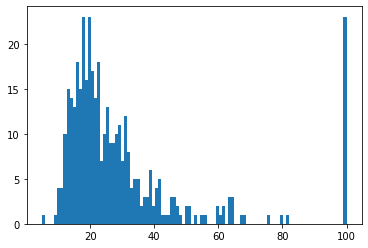

In [ ]:
plt.hist(snrs, bins=100)